In [13]:
from statsmodels.formula.api import ols

import seaborn as sns
import pandas as pd
import numpy as np

In [14]:
np.random.seed(42)

In [15]:
url = 'https://raw.githubusercontent.com/neurodatascience/course-2020-assessments/master/practical/brainsize.csv'
df = pd.read_csv(url, sep=';', na_values='.', index_col=0)

print(df.head(5))
print(len(df.index))

   Gender  FSIQ  VIQ  PIQ  Weight  Height  MRI_Count
1  Female   133  132  124   118.0    64.5     816932
2    Male   140  150  124     NaN    72.5    1001121
3    Male   139  123  150   143.0    73.3    1038437
4    Male   133  129  128   172.0    68.8     965353
5  Female   137  132  134   147.0    65.0     951545
40


In [16]:
partY = np.random.normal(loc=0.0, scale=1.0, size=len(df.index))
df.insert(len(df.columns), 'partY', partY)
print(df.head(5))

   Gender  FSIQ  VIQ  PIQ  Weight  Height  MRI_Count     partY
1  Female   133  132  124   118.0    64.5     816932  0.496714
2    Male   140  150  124     NaN    72.5    1001121 -0.138264
3    Male   139  123  150   143.0    73.3    1038437  0.647689
4    Male   133  129  128   172.0    68.8     965353  1.523030
5  Female   137  132  134   147.0    65.0     951545 -0.234153


In [17]:
model = ols('partY ~ PIQ + Weight', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  partY   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     4.134
Date:                Sun, 31 May 2020   Prob (F-statistic):             0.0244
Time:                        17:37:22   Log-Likelihood:                -46.908
No. Observations:                  38   AIC:                             99.82
Df Residuals:                      35   BIC:                             104.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.5064      1.161     -3.019      0.005      -5.864      -1.149
PIQ            0.0138      0.006      2.186      0.036       0.001       0.027
Weight         0.0113      0.006      1.863      0.071      -0.001       0.024
==============================================================================
Omnibus:                        0.663   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.718   Jarque-Bera (JB):                0.203
Skew:                          -0.166   Prob(JB):                        0.903
Kurtosis:                       3.136   Cond. No.                     1.56e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
new_df = df.drop(1)

In [19]:
model = ols('partY ~ PIQ + Weight', data=new_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  partY   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     4.458
Date:                Sun, 31 May 2020   Prob (F-statistic):             0.0191
Time:                        17:37:22   Log-Likelihood:                -45.440
No. Observations:                  37   AIC:                             96.88
Df Residuals:                      34   BIC:                             101.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.7133      1.169     -3.177      0.003      -6.089      -1.338
PIQ            0.0131      0.006      2.074      0.046       0.000       0.026
Weight         0.0130      0.006      2.095      0.044       0.000       0.026
==============================================================================
Omnibus:                        0.655   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.721   Jarque-Bera (JB):                0.139
Skew:                          -0.115   Prob(JB):                        0.933
Kurtosis:                       3.193   Cond. No.                     1.56e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

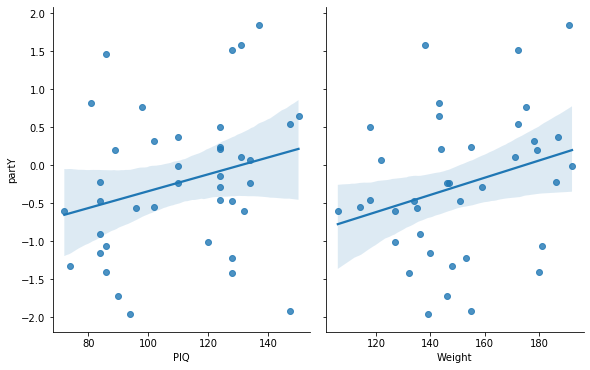

In [20]:
sns.pairplot(df, x_vars=["PIQ", "Weight"], y_vars=["partY"],
             height=5, aspect=.8, kind="reg");

In [21]:
np.random.seed(1)

   Gender  FSIQ  VIQ  PIQ  Weight  Height  MRI_Count     partY    partY2
1  Female   133  132  124   118.0    64.5     816932  0.496714  1.624345
2    Male   140  150  124     NaN    72.5    1001121 -0.138264 -0.611756
3    Male   139  123  150   143.0    73.3    1038437  0.647689 -0.528172
4    Male   133  129  128   172.0    68.8     965353  1.523030 -1.072969
5  Female   137  132  134   147.0    65.0     951545 -0.234153  0.865408


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 partY2   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     1.843
Date:                Sun, 31 May 2020   Prob (F-statistic):              0.173
Time:                        17:37:23   Log-Likelihood:                -50.917
No. Observations:                  38   AIC:                             107.8
Df Residuals:                      35   BIC:                             112.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3327      1.291      1.807      0.079      -0.287       4.953
PIQ           -0.0052      0.007     -0.748      0.460      -0.019       0.009
Weight        -0.0119      0.007     -1.766      0.086      -0.026       0.002
==============================================================================
Omnibus:                        0.356   Durbin-Watson:                   2.345
Prob(Omnibus):                  0.837   Jarque-Bera (JB):                0.320
Skew:                          -0.202   Prob(JB):                        0.852
Kurtosis:                       2.802   Cond. No.                     1.56e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""